In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import tensorflow as tf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = "/content/drive/MyDrive/customer_churn/dataset/customer_churn_large_dataset.xlsx"

df = pd.read_excel(path)

In [ ]:
# Converting to Pandas DataFrame
df = pd.DataFrame(df)
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [ ]:
df.shape

(100000, 9)

In [ ]:
df.dtypes

CustomerID                      int64
Name                           object
Age                             int64
Gender                         object
Location                       object
Subscription_Length_Months      int64
Monthly_Bill                  float64
Total_Usage_GB                  int64
Churn                           int64
dtype: object

In [ ]:
df.describe(include='all')

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000,100000.000000,100000,100000,100000.000000,100000.000000,100000.000000,100000.000000
unique,NaN,100000,NaN,2,5,NaN,NaN,NaN,NaN
top,NaN,Customer_1,NaN,Female,Houston,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,50216,20157,NaN,NaN,NaN,NaN
mean,50000.500000,NaN,44.027020,NaN,NaN,12.490100,65.053197,274.393650,0.497790
std,28867.657797,NaN,15.280283,NaN,NaN,6.926461,20.230696,130.463063,0.499998
min,1.000000,NaN,18.000000,NaN,NaN,1.000000,30.000000,50.000000,0.000000
25%,25000.750000,NaN,31.000000,NaN,NaN,6.000000,47.540000,161.000000,0.000000
50%,50000.500000,NaN,44.000000,NaN,NaN,12.000000,65.010000,274.000000,0.000000
75%,75000.250000,NaN,57.000000,NaN,NaN,19.000000,82.640000,387.000000,1.000000


**Count** for each column is 100,000 which is the total number of data points

**Location**

- Number of locations = 5

- Most common occurring location is **Houston** with 20157 data points

**Gender**

- Majority of the customers are **Female**
- Total number of females = 50216

**Age**


- Mininum age = 18

- Average age = 44

- Maximum Age = 70

**Subscription Duration**

- Minimum = 1 month

- Average = 1 year

- Maximum = 2 years

=> There are no subscriptions that are for more than 2 years



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


## => There are no null values present in the dataset

##This can easily be confirmed using the isnull() method as well as visualized using a bar plot

In [ ]:
df.isnull().any()

CustomerID                    False
Name                          False
Age                           False
Gender                        False
Location                      False
Subscription_Length_Months    False
Monthly_Bill                  False
Total_Usage_GB                False
Churn                         False
dtype: bool

## => This indicates that none of the features contains any null values.

## Visualization for the same can be seen below:

<Axes: >

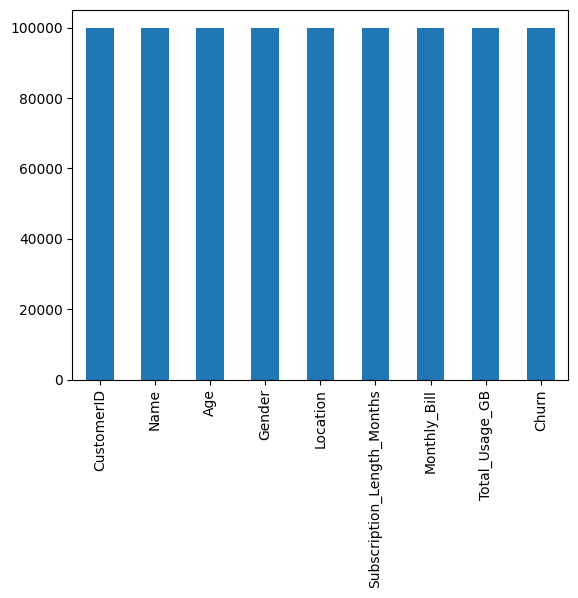

In [ ]:
df.count().plot.bar()

# **Outlier Detection**
## Visualization of outliers using Distribution

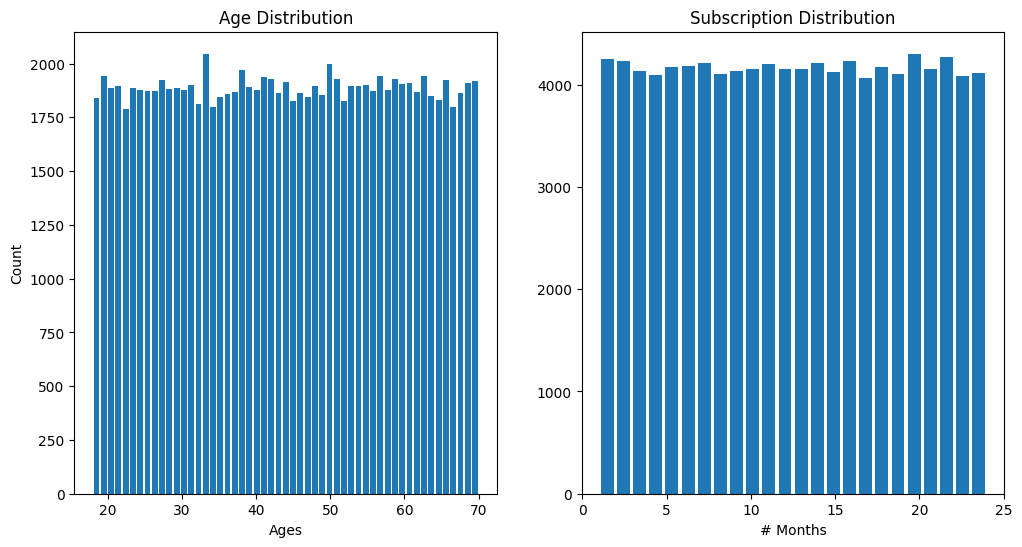

In [ ]:
# Creating a 1x2 grid of subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Histogram of Age
axs[0].hist(df.Age, bins=(df.Age.max()-df.Age.min())+1, rwidth=0.8)
axs[0].set_title("Age Distribution")

# Histogram of subscription months
axs[1].hist(df.Subscription_Length_Months, bins=(df.Subscription_Length_Months.max()-df.Subscription_Length_Months.min())+1,rwidth=0.8)
axs[1].set_title("Subscription Distribution")

axs[0].set_ylabel('Count')
axs[0].set_xlabel('Ages')
axs[1].set_xlabel('# Months')
plt.show()

## **Age Distribution**
### Age histogram exhibits uniform distribution along with the repeated peaks. Same pattern is followed throughout which rules out any possibility of outliers

## **Subscription Distribution**
### - The even distribution of subscriptions suggests that people are subscribing uniformly across various time intervals.

### - It that there are no particular periods that attract significantly more or fewer subscriptions than others

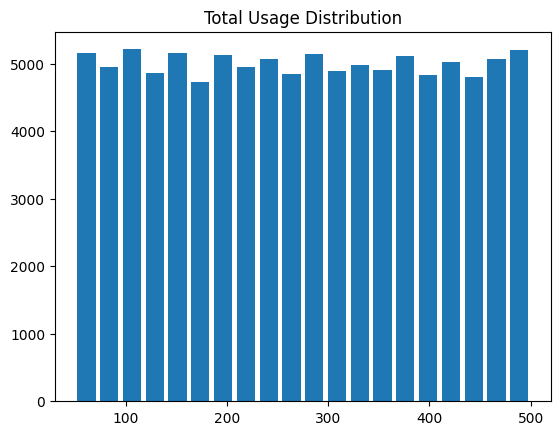

In [ ]:
# Histogram of total usage
plt.hist(df.Total_Usage_GB, bins=20, rwidth=0.8)
plt.title("Total Usage Distribution")
plt.show()

### - There is a uniform distribution of usage across various data packages which indicates that each package is utilized by similar proportion of the total population

### - This could imply that there is no strong preference or bias towards any particular package

### - It is safe to say that there are no outliers

# **Outlier Detection using Z-Score**

### Considering threshold value to be 3. If the z-score > 3, this implies existence of outliers

In [ ]:
# Age
z_score_age = (df.Age - df.Age.mean())/df.Age.std()
z_score_age

0        1.241664
1        1.176220
2       -1.310645
3       -0.525319
4        0.129119
           ...   
99995   -0.721650
99996    1.176220
99997    1.307108
99998    0.456338
99999   -1.114313
Name: Age, Length: 100000, dtype: float64

In [ ]:
df.Age[z_score_age >=3].count()

0

In [ ]:
# Monthly Bill
z_score_bill = (df.Monthly_Bill - df.Monthly_Bill.mean())/df.Monthly_Bill.std()
z_score_bill

0        0.410604
1       -0.805370
2        1.009199
3        1.625589
4       -0.341718
           ...   
99995   -0.490502
99996   -0.168219
99997    1.535133
99998   -0.781149
99999    0.569274
Name: Monthly_Bill, Length: 100000, dtype: float64

In [ ]:
df.Monthly_Bill[z_score_bill >=3].count()

0

In [ ]:
# Total_Usage_GB
# Monthly Bill
z_score_usage = (df.Total_Usage_GB - df.Total_Usage_GB.mean())/df.Total_Usage_GB.std()
z_score_usage

0       -0.294288
1       -0.784848
2        1.422674
3        0.173278
4       -0.064337
           ...   
99995   -0.370938
99996    0.587188
99997   -0.179312
99998    1.223383
99999   -0.777183
Name: Total_Usage_GB, Length: 100000, dtype: float64

In [ ]:
df.Total_Usage_GB[z_score_bill >=3].count()

0

### The Z-score test implies that there are no existence of outliers in the features - Age, Monthly Bill and Total Usage

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


# **Encoding Categorical Data**

In [ ]:
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


### There are two categorial features that need to be encoded, namely, Gender and Location

### Extracting unique values from each feature

In [ ]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

=> Two unique values:
- Male
- Female

In [ ]:
df['Location'].unique()

array(['Los Angeles', 'New York', 'Miami', 'Chicago', 'Houston'],
      dtype=object)

=> Five unique values:
- Los Angeles
- New York
- Miami
- Chicago
- Houston

In [ ]:
df

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0
...,...,...,...,...,...,...,...,...,...
99995,99996,Customer_99996,33,Male,Houston,23,55.13,226,1
99996,99997,Customer_99997,62,Female,New York,19,61.65,351,0
99997,99998,Customer_99998,64,Male,Chicago,17,96.11,251,1
99998,99999,Customer_99999,51,Female,New York,20,49.25,434,1


### Applying Label-Encoding on Gender Feature
#### using sklearn

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


In [ ]:
# Label Encoding
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  int64  
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 6.9+ MB


### Applying One Hot Encoding on  Locations Feature


In [ ]:
# Saving column names
dummy_cols = pd.get_dummies(df['Location']).columns
dummy_cols = list(dummy_cols)

cols =  dummy_cols + ['CustomerId','Name','Age','Gender'] + ['Subscription_Length_Months','Monthly_Bill','Total_Usage_GB','Churn']
cols

['Chicago',
 'Houston',
 'Los Angeles',
 'Miami',
 'New York',
 'CustomerId',
 'Name',
 'Age',
 'Gender',
 'Subscription_Length_Months',
 'Monthly_Bill',
 'Total_Usage_GB',
 'Churn']

In [ ]:
ct = ColumnTransformer(transformers = [('encoder', OneHotEncoder(),[4])], remainder='passthrough')
df = pd.DataFrame(ct.fit_transform(df))


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   0       100000 non-null  object
 1   1       100000 non-null  object
 2   2       100000 non-null  object
 3   3       100000 non-null  object
 4   4       100000 non-null  object
 5   5       100000 non-null  object
 6   6       100000 non-null  object
 7   7       100000 non-null  object
 8   8       100000 non-null  object
 9   9       100000 non-null  object
 10  10      100000 non-null  object
 11  11      100000 non-null  object
 12  12      100000 non-null  object
dtypes: object(13)
memory usage: 9.9+ MB


In [ ]:
df.columns = cols
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   Chicago                     100000 non-null  object
 1   Houston                     100000 non-null  object
 2   Los Angeles                 100000 non-null  object
 3   Miami                       100000 non-null  object
 4   New York                    100000 non-null  object
 5   CustomerId                  100000 non-null  object
 6   Name                        100000 non-null  object
 7   Age                         100000 non-null  object
 8   Gender                      100000 non-null  object
 9   Subscription_Length_Months  100000 non-null  object
 10  Monthly_Bill                100000 non-null  object
 11  Total_Usage_GB              100000 non-null  object
 12  Churn                       100000 non-null  object
dtypes: object(13)
memory usage: 9.

In [ ]:
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Chicago                     100000 non-null  float64
 1   Houston                     100000 non-null  float64
 2   Los Angeles                 100000 non-null  float64
 3   Miami                       100000 non-null  float64
 4   New York                    100000 non-null  float64
 5   CustomerId                  100000 non-null  int64  
 6   Name                        0 non-null       float64
 7   Age                         100000 non-null  int64  
 8   Gender                      100000 non-null  int64  
 9   Subscription_Length_Months  100000 non-null  int64  
 10  Monthly_Bill                100000 non-null  float64
 11  Total_Usage_GB              100000 non-null  int64  
 12  Churn                       100000 non-null  int64  
dtypes: float64(7), 

# Train Test Splitting

In [ ]:
y = df.iloc[:,-1]
y = np.array(y)
y

array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
# drop CustomerId column
df = df.drop(columns=['CustomerId', 'Name'])
df = df[['Chicago','Houston','Los Angeles','Miami','Gender','Age','Subscription_Length_Months','Monthly_Bill','Total_Usage_GB']]
X = df.iloc[:,:-1]
X

,Chicago,Houston,Los Angeles,Miami,Gender,Age,Subscription_Length_Months,Monthly_Bill
0,0.0,0.0,1.0,0.0,1,63,17,73.36
1,0.0,0.0,0.0,0.0,0,62,1,48.76
2,0.0,0.0,1.0,0.0,0,24,5,85.47
3,0.0,0.0,0.0,1.0,0,36,3,97.94
4,0.0,0.0,0.0,1.0,0,46,19,58.14
...,...,...,...,...,...,...,...,...
99995,0.0,1.0,0.0,0.0,1,33,23,55.13
99996,0.0,0.0,0.0,0.0,0,62,19,61.65
99997,1.0,0.0,0.0,0.0,1,64,17,96.11
99998,0.0,0.0,0.0,0.0,0,51,20,49.25


In [ ]:
# splitting the dataset
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
X_train

,Chicago,Houston,Los Angeles,Miami,Gender,Age,Subscription_Length_Months,Monthly_Bill
75220,0.0,0.0,0.0,0.0,0,54,5,84.50
48955,0.0,0.0,0.0,0.0,1,28,24,82.06
44966,1.0,0.0,0.0,0.0,1,57,12,52.29
13568,0.0,1.0,0.0,0.0,1,19,19,32.57
92727,0.0,0.0,0.0,1.0,0,56,8,33.52
...,...,...,...,...,...,...,...,...
6265,0.0,0.0,0.0,1.0,1,35,21,67.33
54886,1.0,0.0,0.0,0.0,1,56,13,85.40
76820,0.0,1.0,0.0,0.0,1,69,2,76.24
860,1.0,0.0,0.0,0.0,1,55,12,89.19


# **Feature Scaling**
## Standardization (z-score)

In [ ]:
# Creating an instance of Standard Scaler
sc = StandardScaler()
X_train.iloc[:,5:] = sc.fit_transform(X_train.iloc[:,5:])
X_train

,Chicago,Houston,Los Angeles,Miami,Gender,Age,Subscription_Length_Months,Monthly_Bill
75220,0.0,0.0,0.0,0.0,0,0.653447,-1.082728,0.960255
48955,0.0,0.0,0.0,0.0,1,-1.048276,1.663882,0.839624
44966,1.0,0.0,0.0,0.0,1,0.849799,-0.070819,-0.632174
13568,0.0,1.0,0.0,0.0,1,-1.637334,0.941090,-1.607109
92727,0.0,0.0,0.0,1.0,0,0.784348,-0.649053,-1.560142
...,...,...,...,...,...,...,...,...
6265,0.0,0.0,0.0,1.0,1,-0.590120,1.230207,0.111388
54886,1.0,0.0,0.0,0.0,1,0.784348,0.073739,1.004750
76820,0.0,1.0,0.0,0.0,1,1.635210,-1.516404,0.551889
860,1.0,0.0,0.0,0.0,1,0.718898,-0.070819,1.192123


In [ ]:
X_test.iloc[:,5:] = sc.transform(X_test.iloc[:,5:])
X_test

,Chicago,Houston,Los Angeles,Miami,Gender,Age,Subscription_Length_Months,Monthly_Bill
75721,0.0,1.0,0.0,0.0,0,0.260742,-0.215378,1.157022
80184,0.0,0.0,0.0,0.0,1,0.326192,0.073739,-1.209620
19864,0.0,0.0,1.0,0.0,0,-0.851923,-1.082728,-1.585356
76699,0.0,0.0,0.0,0.0,1,0.587996,-1.227287,1.462554
92991,0.0,0.0,1.0,0.0,0,-1.375530,1.663882,0.847039
...,...,...,...,...,...,...,...,...
32595,0.0,0.0,0.0,1.0,1,-0.393767,1.085648,0.722948
29313,0.0,0.0,1.0,0.0,1,0.587996,-0.070819,1.565882
37862,0.0,0.0,0.0,1.0,1,1.569759,0.073739,-1.272902
53421,0.0,0.0,0.0,1.0,1,-0.655571,0.073739,1.486285


# **Model Building**
## **Logistic Regression**

In [ ]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train,y_train)

In [ ]:
y_pred_lg = lg_model.predict(X_test)
print(classification_report(y_test,y_pred_lg))

              precision    recall  f1-score   support

           0       0.51      0.63      0.56     10079
           1       0.50      0.37      0.43      9921

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.49     20000
weighted avg       0.50      0.50      0.49     20000



### Total overall accuracy is 50%
### Precision for True Negatives is 51% and that of True Positives is 51%

### The performance is average

## **Support** **Vector** Machines

In [ ]:
svm_model = SVC()
svm_model = svm_model.fit(X_train,y_train)

In [ ]:
y_pred_svm = svm_model.predict(X_test)
print(classification_report(y_test,y_pred_svm))

              precision    recall  f1-score   support

           0       0.51      0.56      0.53     10079
           1       0.50      0.45      0.47      9921

    accuracy                           0.51     20000
   macro avg       0.51      0.51      0.50     20000
weighted avg       0.51      0.51      0.50     20000



### The performance of SVM is quite similar to Logistic Regression
### However in some cases it performes better, like in case of recall and f1-score

## **Random** **Forest Classifier**

In [ ]:
rand_forest_model = RandomForestClassifier()
rand_forest_model.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred_forest = rand_forest_model.predict(X_test)
print(classification_report(y_test,y_pred_forest))

              precision    recall  f1-score   support

           0       0.50      0.50      0.50     10079
           1       0.49      0.49      0.49      9921

    accuracy                           0.49     20000
   macro avg       0.49      0.49      0.49     20000
weighted avg       0.49      0.49      0.49     20000



In [ ]:
rand_forest_model.score(X_test,y_test)

0.4943

### Overall the Random Forest is performing worse than both Logistic Regression and SVM with an accuracy of less than 50%

# Fine Tuning Random Forest
### Checking the performance by increasing the number of Trees

In [ ]:
rand_forest_model = RandomForestClassifier(n_estimators=20)
rand_forest_model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=20)

In [ ]:
rand_forest_model.score(X_test,y_test)

0.4944

### For 20 trees the model does not improve that much
### Further increasing the number of Trees

In [ ]:
rand_forest_model = RandomForestClassifier(n_estimators=40)
rand_forest_model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=40)

In [ ]:
rand_forest_model.score(X_test,y_test)

0.4973

In [ ]:
rand_forest_pred = rand_forest_model.predict(X_test)

### Best performance occurs with n_estimators = 40
### Further increasing the value leads to diminishing returns

In [ ]:
# Plotting Confusion Matrix for Random Forest
cm = confusion_matrix(y_test,rand_forest_pred)


In [ ]:
cm

array([[5236, 4843],
       [5211, 4710]])

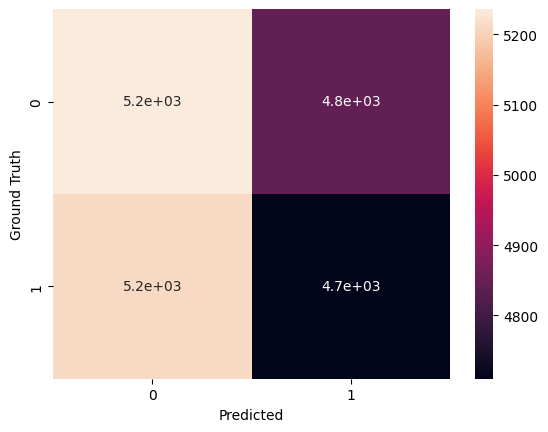

In [ ]:
# Visualizing the confusion matrix
%matplotlib inline
import seaborn as sns
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Ground Truth')
plt.show()

### - 5200 True Negatives were correctly predicted
### - 4700 True Positives were correctly predicted
### - A similar number of predicted values were wrongly predicted
#### -- This implies the accuracy of the model is around 50% as seen previously

# Neural Network

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'],label='loss')
  plt.plot(history.history['val_loss'],label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Binary Crossentropy')
  plt.legend()
  plt.grid(True)
  plt.show()

def plot_accuracy(history):
  plt.plot(history.history['accuracy'],label='accuracy')
  plt.plot(history.history['val_accuracy'],label='val_accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.grid(True)
  plt.show()



In [ ]:
nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid'),
])

nn_model.compile(optimizer=tf.keras.optimizers.Adam(0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = nn_model.fit(
    X_train, y_train,epochs=100,batch_size=32,validation_split=0.2
)

Epoch 1/100
2000/2000 [==============================] - 7s 3ms/step - loss: 0.6945 - accuracy: 0.5004 - val_loss: 0.6940 - val_accuracy: 0.5013
Epoch 2/100
2000/2000 [==============================] - 6s 3ms/step - loss: 0.6934 - accuracy: 0.5054 - val_loss: 0.6933 - val_accuracy: 0.5003
Epoch 3/100
2000/2000 [==============================] - 5s 3ms/step - loss: 0.6932 - accuracy: 0.5054 - val_loss: 0.6933 - val_accuracy: 0.4963
Epoch 4/100
2000/2000 [==============================] - 7s 4ms/step - loss: 0.6931 - accuracy: 0.5064 - val_loss: 0.6938 - val_accuracy: 0.4970
Epoch 5/100
2000/2000 [==============================] - 14s 7ms/step - loss: 0.6931 - accuracy: 0.5089 - val_loss: 0.6933 - val_accuracy: 0.5019
Epoch 6/100
2000/2000 [==============================] - 5s 2ms/step - loss: 0.6930 - accuracy: 0.5090 - val_loss: 0.6934 - val_accuracy: 0.5002
Epoch 7/100
2000/2000 [==============================] - 5s 3ms/step - loss: 0.6930 - accuracy: 0.5102 - val_loss: 0.6935 - val_a

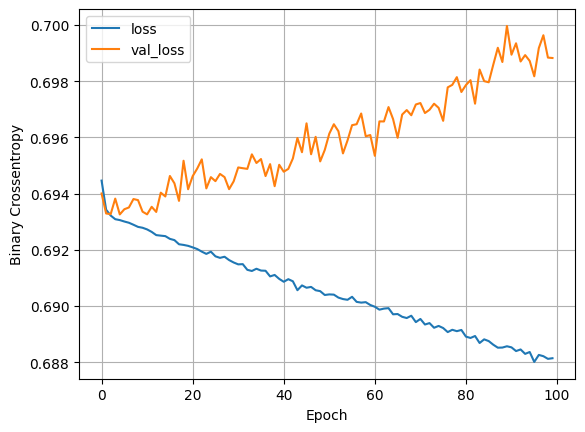

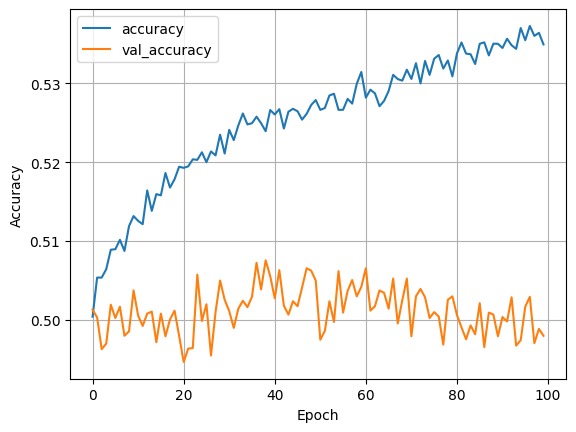

In [ ]:
plot_loss(history)
plot_accuracy(history)

## The Neural Networks are performing well as the loss is clearly decreasing and the accuracy is increasing with each iteration.

## The accuracy however is 53% which is better than the other algorithms

# Fine Tuning model parameters
## testing on learning rate = 0.005 and 64 neurons in the 2nd layer


In [ ]:
nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid'),
])

nn_model.compile(optimizer=tf.keras.optimizers.Adam(0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = nn_model.fit(
    X_train, y_train,epochs=100,batch_size=32,validation_split=0.2
)

Epoch 1/100
2000/2000 [==============================] - 9s 3ms/step - loss: 0.6943 - accuracy: 0.4991 - val_loss: 0.6945 - val_accuracy: 0.4971
Epoch 2/100
2000/2000 [==============================] - 5s 3ms/step - loss: 0.6935 - accuracy: 0.5016 - val_loss: 0.6935 - val_accuracy: 0.4930
Epoch 3/100
2000/2000 [==============================] - 7s 3ms/step - loss: 0.6932 - accuracy: 0.5040 - val_loss: 0.6932 - val_accuracy: 0.5009
Epoch 4/100
2000/2000 [==============================] - 5s 3ms/step - loss: 0.6932 - accuracy: 0.5063 - val_loss: 0.6933 - val_accuracy: 0.4960
Epoch 5/100
2000/2000 [==============================] - 6s 3ms/step - loss: 0.6930 - accuracy: 0.5095 - val_loss: 0.6933 - val_accuracy: 0.4999
Epoch 6/100
2000/2000 [==============================] - 4s 2ms/step - loss: 0.6929 - accuracy: 0.5086 - val_loss: 0.6935 - val_accuracy: 0.4974
Epoch 7/100
2000/2000 [==============================] - 5s 3ms/step - loss: 0.6929 - accuracy: 0.5092 - val_loss: 0.6935 - val_ac

## Accuracy is approx 53% which is better than the rest of the algorithms

### Script to find the best possible parameters for neural network

In [ ]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)

  plt.show()

In [ ]:
def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
  nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes, activation='relu'),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(num_nodes, activation='relu'),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy',
                  metrics=['accuracy'])
  history = nn_model.fit(
    X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0
  )

  return nn_model, history

16 nodes, dropout 0, lr 0.01, batch size 32


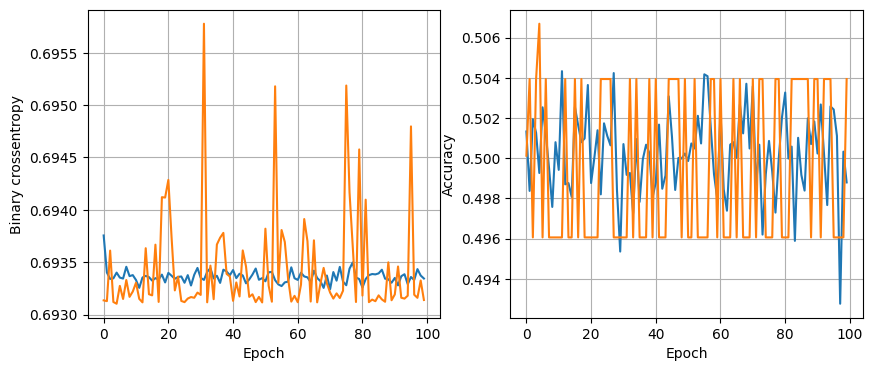

625/625 [==============================] - 1s 2ms/step - loss: 0.6932 - accuracy: 0.4961
16 nodes, dropout 0, lr 0.01, batch size 64


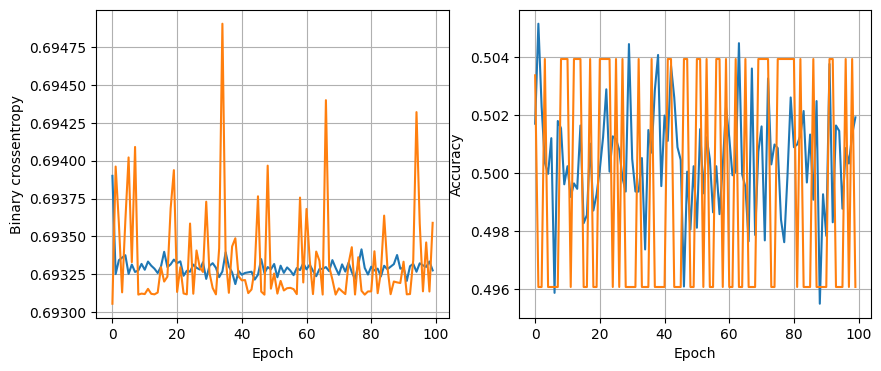

625/625 [==============================] - 1s 2ms/step - loss: 0.6932 - accuracy: 0.5039
16 nodes, dropout 0, lr 0.005, batch size 32


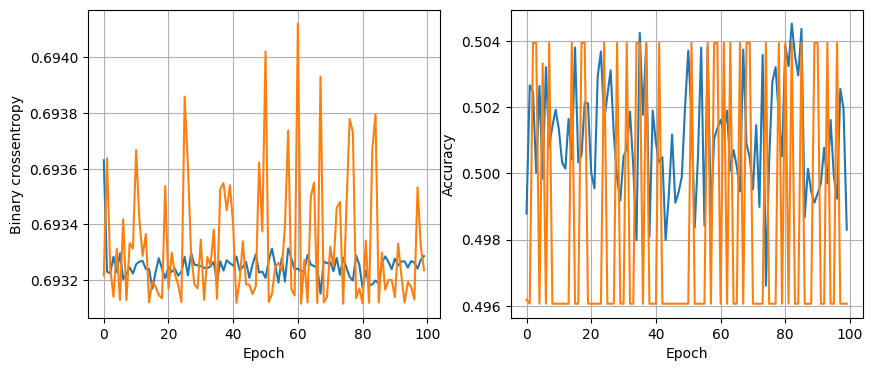

625/625 [==============================] - 1s 2ms/step - loss: 0.6931 - accuracy: 0.5039
16 nodes, dropout 0, lr 0.005, batch size 64


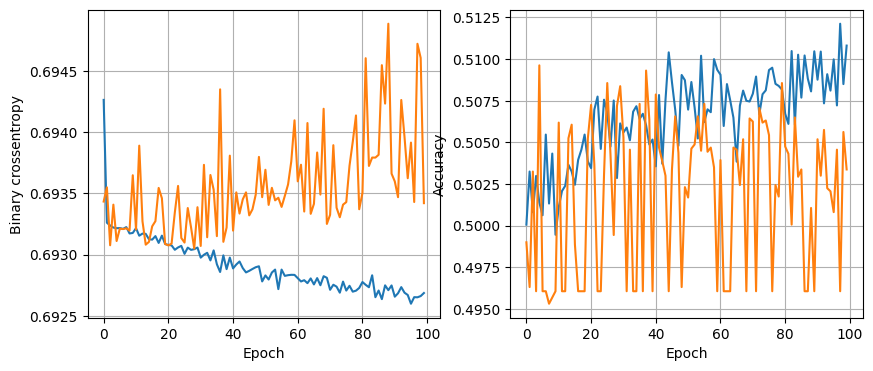

625/625 [==============================] - 1s 2ms/step - loss: 0.6937 - accuracy: 0.4975
16 nodes, dropout 0, lr 0.001, batch size 32


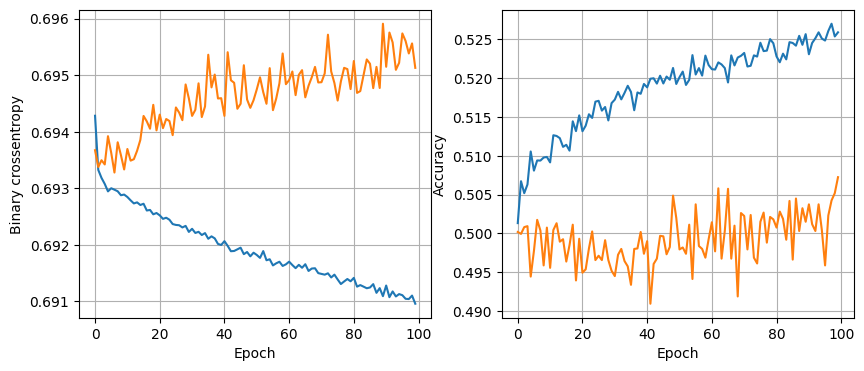

625/625 [==============================] - 1s 2ms/step - loss: 0.6958 - accuracy: 0.4988
16 nodes, dropout 0, lr 0.001, batch size 64


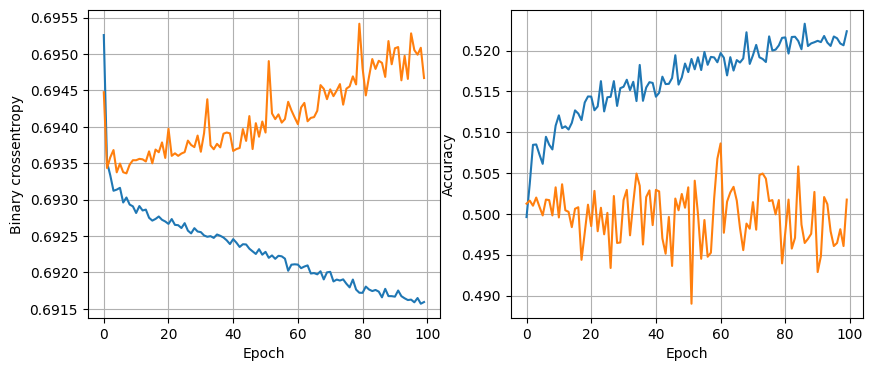

625/625 [==============================] - 1s 2ms/step - loss: 0.6947 - accuracy: 0.4988
16 nodes, dropout 0.2, lr 0.01, batch size 32


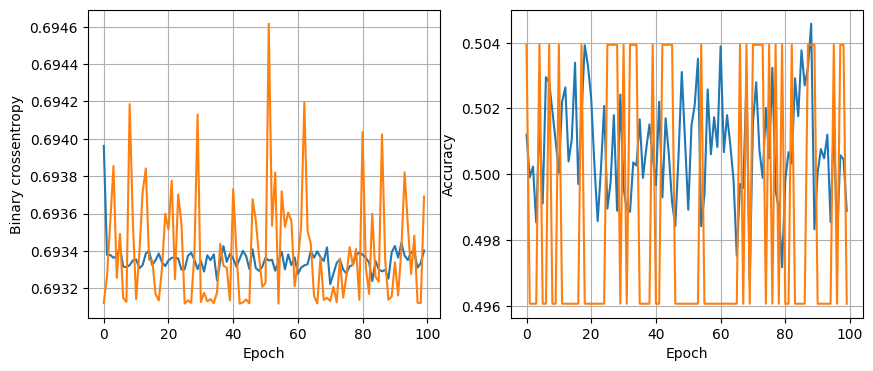

625/625 [==============================] - 1s 2ms/step - loss: 0.6933 - accuracy: 0.5039
16 nodes, dropout 0.2, lr 0.01, batch size 64


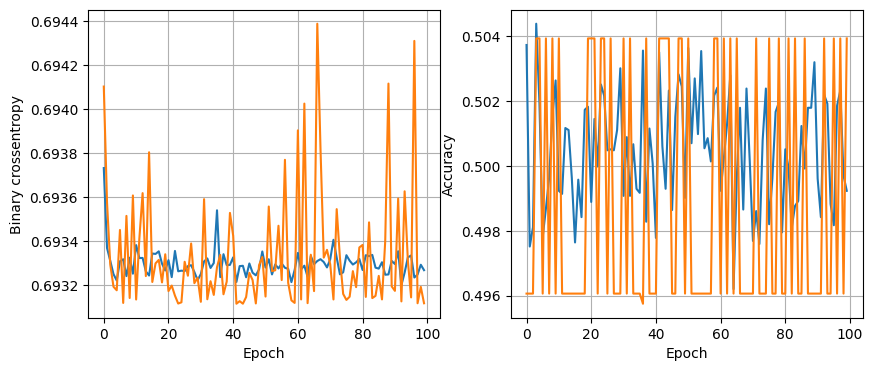

625/625 [==============================] - 3s 2ms/step - loss: 0.6933 - accuracy: 0.4961
16 nodes, dropout 0.2, lr 0.005, batch size 32


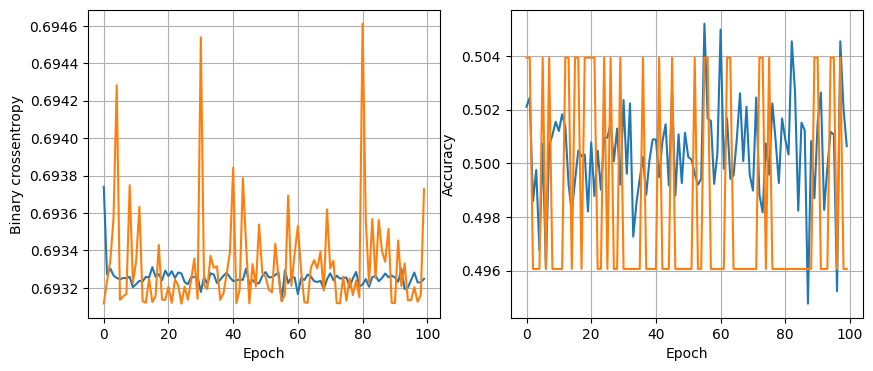

625/625 [==============================] - 1s 2ms/step - loss: 0.6933 - accuracy: 0.5039
16 nodes, dropout 0.2, lr 0.005, batch size 64


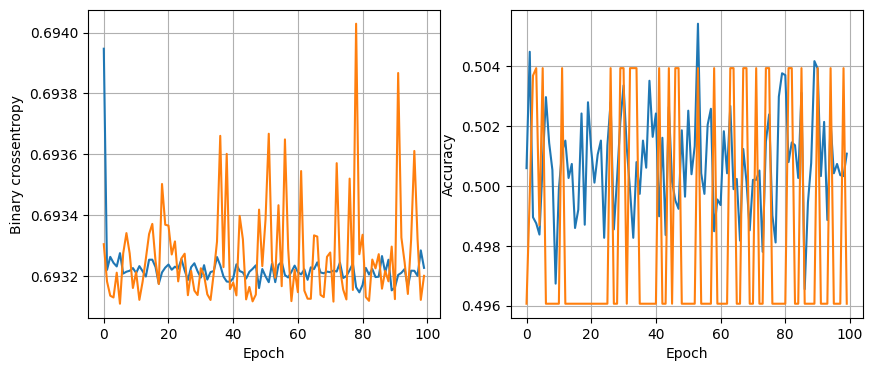

625/625 [==============================] - 2s 3ms/step - loss: 0.6931 - accuracy: 0.5039
16 nodes, dropout 0.2, lr 0.001, batch size 32


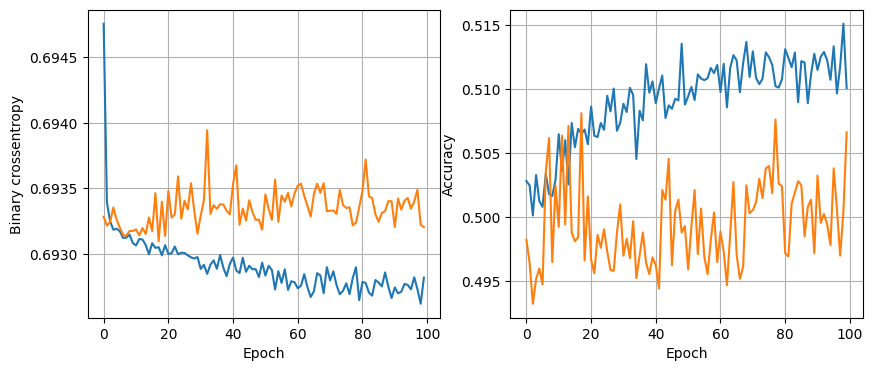

625/625 [==============================] - 1s 2ms/step - loss: 0.6933 - accuracy: 0.5016
16 nodes, dropout 0.2, lr 0.001, batch size 64


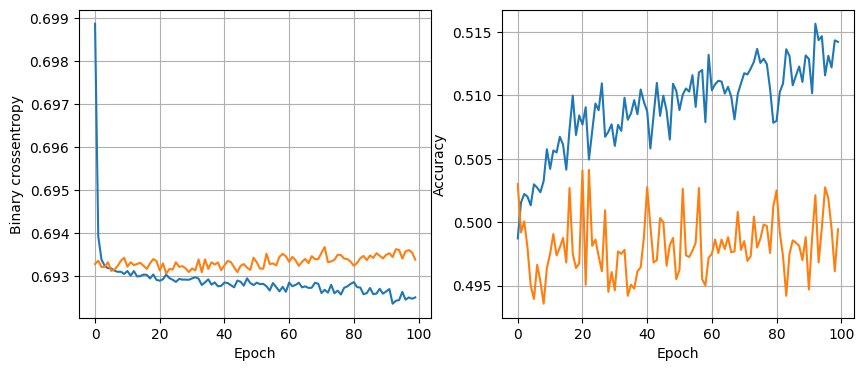

625/625 [==============================] - 1s 2ms/step - loss: 0.6937 - accuracy: 0.4982
32 nodes, dropout 0, lr 0.01, batch size 32


KeyboardInterrupt: ignored

In [96]:
least_val_loss = float('inf')
least_loss_model = None
epochs=100
for num_nodes in [16, 32, 64]:
  for dropout_prob in[0, 0.2]:
    for lr in [0.01, 0.005, 0.001]:
      for batch_size in [32, 64]:
        print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")
        model, history = train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
        plot_history(history)
        val_loss = model.evaluate(X_test, y_test)[0]
        if val_loss < least_val_loss:
          least_val_loss = val_loss
          least_loss_model = model